# ACP & k-clustering

### Load data

In [3]:
import pandas as pd
from Functions.constants import *
from Functions.Common_functions import *

df = formate_dataset()

In [4]:
df.head()

Relative compactness Surface area  Wall area Roof area Overall height  \
0              2.06355     -1.59779  -0.269786  -1.42786              1   
1               2.0694     -1.71823  -0.422547  -1.47112              1   
2              2.03073     -1.75999  -0.340612  -1.55169              1   
3              2.01447     -1.72899  -0.581134  -1.40454              1   
4              1.30869     -1.34281 -0.0477237  -1.28699              1   

  Glazing area GAD : 0 GAD : 1 GAD : 2 GAD : 3 GAD : 4 GAD : 5 East North  \
0     -1.64028       0       1       0       0       1       0    0     0   
1     -1.83179       1       0       0       0       1       0    0     0   
2     -1.76649       0       0       1       0       1       0    0     0   
3     -1.76117       0       0       0       1       1       0    0     0   
4     -1.81079       0       1       0       0       1       0    0     0   

  South West   Energy Energy efficiency  
0     0    0  34.2639                 B  
1     0    0  34.5898                 B  
2     0    0   38.778                 C  
3     0    0  37.9478                 C  
4     0    0  47.6759                 D

### Drop qualitative features

In [5]:
Energy_no_norm = df.Energy.copy()
Energy_label = df["Energy efficiency"].copy()

In [6]:
import numpy as np

qualitative_X_features = df.columns[6:16]
qualitative_y_features = df.columns[-1:]
print(qualitative_y_features)

qualitative_features = np.concatenate((qualitative_X_features, qualitative_y_features), axis=0)
df = df.drop(columns=qualitative_features)

df.head()

Index(['Energy efficiency'], dtype='object')


Relative compactness Surface area  Wall area Roof area Overall height  \
0              2.06355     -1.59779  -0.269786  -1.42786              1   
1               2.0694     -1.71823  -0.422547  -1.47112              1   
2              2.03073     -1.75999  -0.340612  -1.55169              1   
3              2.01447     -1.72899  -0.581134  -1.40454              1   
4              1.30869     -1.34281 -0.0477237  -1.28699              1   

  Glazing area   Energy  
0     -1.64028  34.2639  
1     -1.83179  34.5898  
2     -1.76649   38.778  
3     -1.76117  37.9478  
4     -1.81079  47.6759

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# get name of columns
columns = df.columns

# create a normalization for "Energy" column 
preprocessor_y = ColumnTransformer(
    transformers=[
        ('scale_y', StandardScaler(), ['Energy'])], remainder='passthrough')

df = preprocessor_y.fit_transform(df)

In [8]:
df = pd.DataFrame(data=df, columns=['Energy', 'Relative Compactness', 'Surface area', 'Wall area','Roof area', 'Overall height', 'Glazing area'])
df.head()

Energy Relative Compactness Surface area  Wall area Roof area  \
0  -0.637763              2.06355     -1.59779  -0.269786  -1.42786   
1  -0.621349               2.0694     -1.71823  -0.422547  -1.47112   
2  -0.410353              2.03073     -1.75999  -0.340612  -1.55169   
3  -0.452178              2.01447     -1.72899  -0.581134  -1.40454   
4  0.0378983              1.30869     -1.34281 -0.0477237  -1.28699   

  Overall height Glazing area  
0              1     -1.64028  
1              1     -1.83179  
2              1     -1.76649  
3              1     -1.76117  
4              1     -1.81079

## ACP

<BarContainer object of 7 artists>

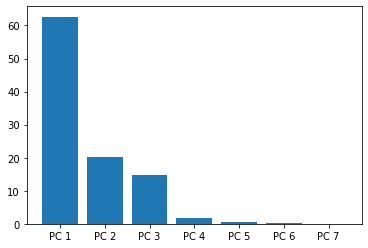

In [9]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
pca = PCA()
X7D = pca.fit_transform(df)

plt.bar(x = ['PC {}'.format(x) for x in range(1,len(pca.explained_variance_ratio_)+1)], 
        height = pca.explained_variance_ratio_*100)

<BarContainer object of 3 artists>

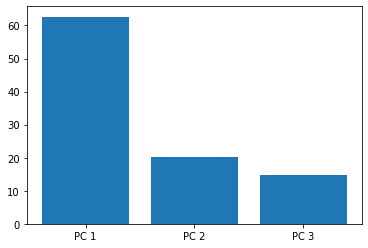

In [10]:
pca = PCA(n_components=0.95, svd_solver="full")
X3D = pca.fit_transform(df)

plt.bar(x = ['PC {}'.format(x) for x in range(1,len(pca.explained_variance_ratio_)+1)], 
        height = pca.explained_variance_ratio_*100)

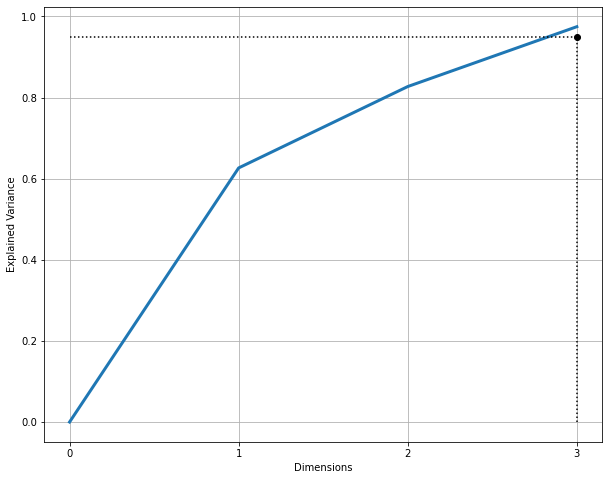

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# create an array with sum of all explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.insert(cumsum, 0, 0., axis=0)

d = np.argmax(cumsum >= 0.95)

plt.figure(figsize=(10,8))
plt.plot([0,1,2,3], cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.xticks([0,1,2,3])
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### ACP 2 componants

In [12]:
d = {"pc1": X3D[:, 0], "pc2": X3D[:, 1], "pc3": X3D[:, 2], "Energy_no_norm":Energy_no_norm, 
     "Energy_label": Energy_label}
X3D = pd.DataFrame(data=d)
X3D.head()

pc1       pc2       pc3 Energy_no_norm Energy_label
0  2.400834 -1.745821  1.688338        34.2639            B
1  2.465480 -1.937275  1.830087        34.5898            B
2  2.601151 -1.784988  1.769258         38.778            C
3  2.474400 -1.983867  1.696717        37.9478            C
4  2.188570 -1.063675  1.835930        47.6759            D

Text(0.5, 1.0, 'Classification vision of PCA')

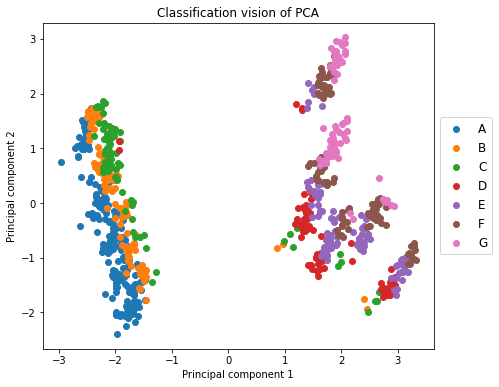

In [13]:
import collections

plt.figure(figsize=(7,6))

def plot_classification_pca(subplot=plt):
    list_labels = ["A","B","C", "D", "E", "F", "G"]
    for value in list_labels:
        subplot.scatter(X3D["pc1"].where(X3D["Energy_label"]==value), X3D["pc2"].where(X3D["Energy_label"]==value),  label=value)
    subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 12)
        
plot_classification_pca()

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title("Classification vision of PCA")


Text(0.5, 1.0, 'Classification vision of PCA')

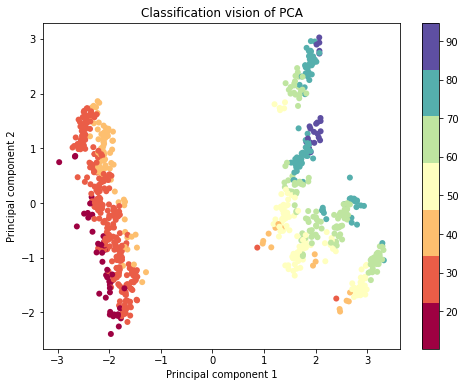

In [12]:
import collections

plt.figure(figsize=(8,6))

plt.scatter(X3D.pc1, X3D.pc2,c=Energy_no_norm, edgecolor='none', alpha=1, cmap=plt.cm.get_cmap('Spectral', 7))

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar()
plt.title("Classification vision of PCA")

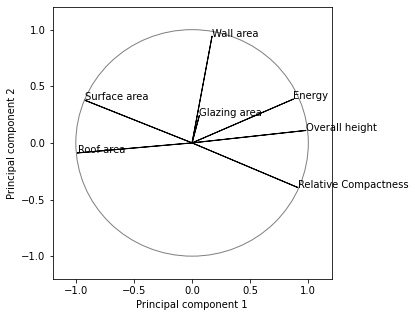

In [13]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

for i, j, nom in zip(coord1,coord2, df.columns.values):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))

# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()


### K-means 2 componants

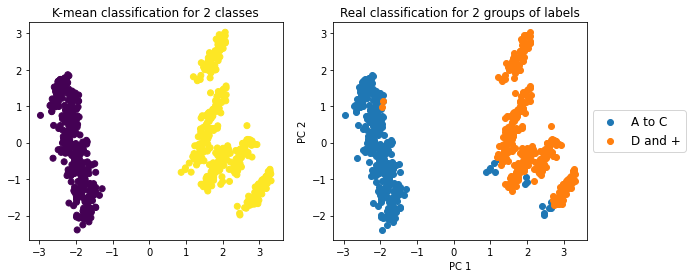

In [14]:
from sklearn.cluster import KMeans

X2D = X3D.iloc[:, :2] # Get the 2 first columns of the 3D PCA transformation
y_kmeans_2 = KMeans(n_clusters=2, random_state=0).fit_predict(X2D)


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(X2D.iloc[:, 0], X2D.iloc[:, 1], c=y_kmeans_2)
axs[0].set_title("K-mean classification for 2 classes")

axs[1].scatter(X3D["pc1"].where(X3D["Energy_label"].isin(["A", "B" , "C"])), 
               X3D["pc2"].where(X3D["Energy_label"].isin(["A", "B", "C"])),  label="A to C")
axs[1].scatter(X3D["pc1"].where(X3D["Energy_label"].isin(["D", "E", "F", "G"])), 
               X3D["pc2"].where(X3D["Energy_label"].isin(["D", "E", "F", "G"])),  label="D and +")
axs[1].set_title("Real classification for 2 groups of labels")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 12)
plt.show()


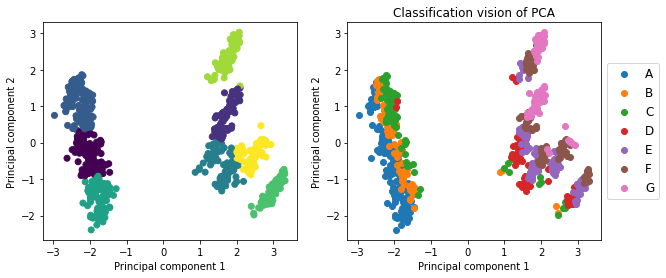

In [15]:
y_kmeans_8 = KMeans(n_clusters=8, random_state=0).fit_predict(X2D)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(X2D.iloc[:, 0], X2D.iloc[:, 1], c=y_kmeans_8)

plot_classification_pca(axs[1])

for ax in axs:
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
axs[1].set_title("Classification vision of PCA")

plt.show()

### ACP 3 componants

<IPython.core.display.Javascript object>


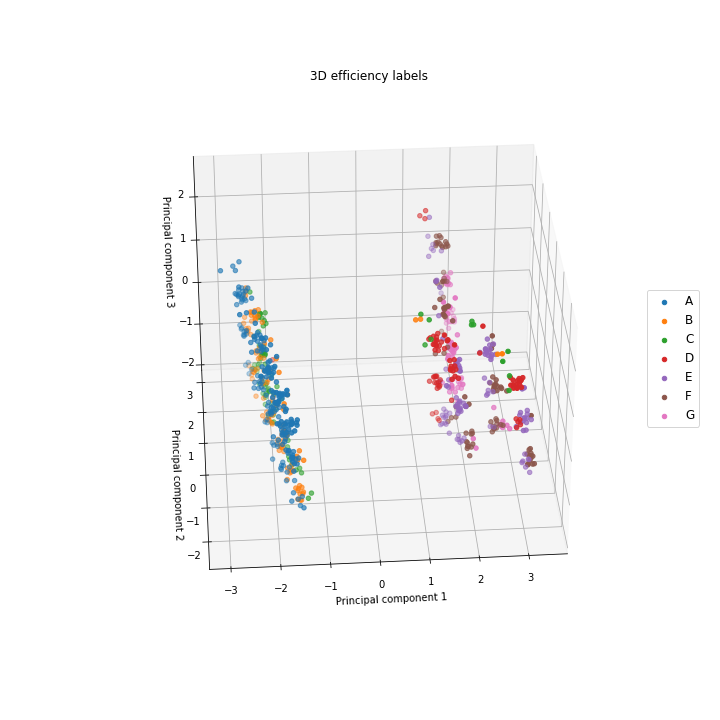

In [18]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# plot in 3D efficiency labels
def plot_3d_pca_clf():

    list_labels = ["A","B","C", "D", "E", "F", "G"]
    for value in list_labels:
        ax.scatter(X3D["pc1"].where(X3D["Energy_label"]==value), 
                    X3D["pc2"].where(X3D["Energy_label"]==value),
                    X3D["pc3"].where(X3D["Energy_label"]==value),
                    label=value)
        
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 12)

    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
    ax.set_zlabel('Principal component 3')
    ax.set_title('3D efficiency labels')

# plot in 3D efficiency values
def plot_3d_pca_reg():
    p = ax.scatter(x, y, z, c=Energy_no_norm, alpha=1, cmap=plt.get_cmap("Spectral", 7))
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
    ax.set_zlabel('Principal component 3')
    plt.colorbar(p)
    
plot_3d_pca_clf()


### K-means 3 componants

C:\Users\User\Anaconda3\envs\Python\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


<IPython.core.display.Javascript object>


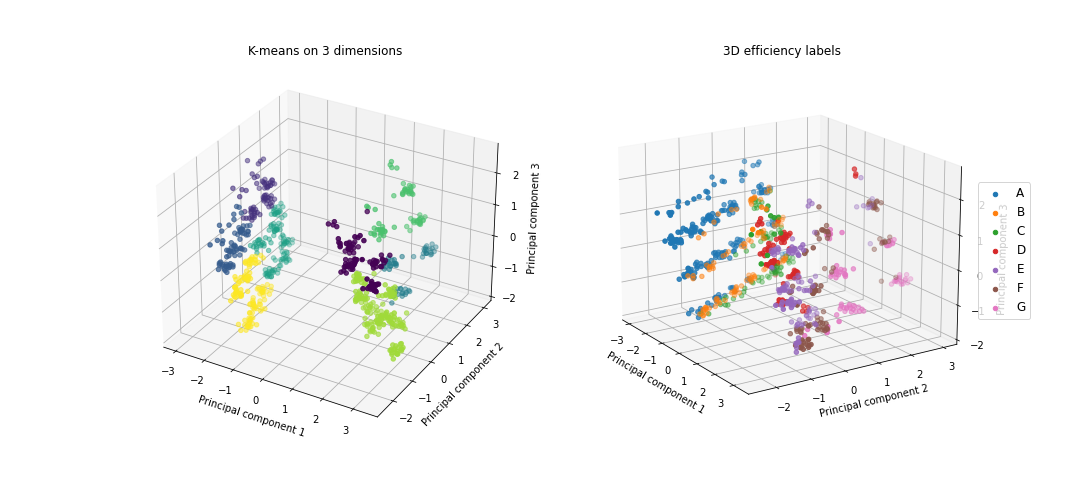

In [23]:
y_kmeans_8 = KMeans(n_clusters=8, random_state=0, max_iter=10000, n_jobs=-1).fit_predict(X3D.iloc[:,:3])

fig = plt.figure(figsize=(15,7))

# First subplot 
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X3D.pc1, X3D.pc2, X3D.pc3, c=y_kmeans_8)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')
ax.set_title("K-means on 3 dimensions")

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot_3d_pca_clf()


for ax in axs:
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')

plt.show()

We can see that in 3 dimensions, the k-means classifier is more accurate with the labels "D", "E", "F", "G".

<IPython.core.display.Javascript object>


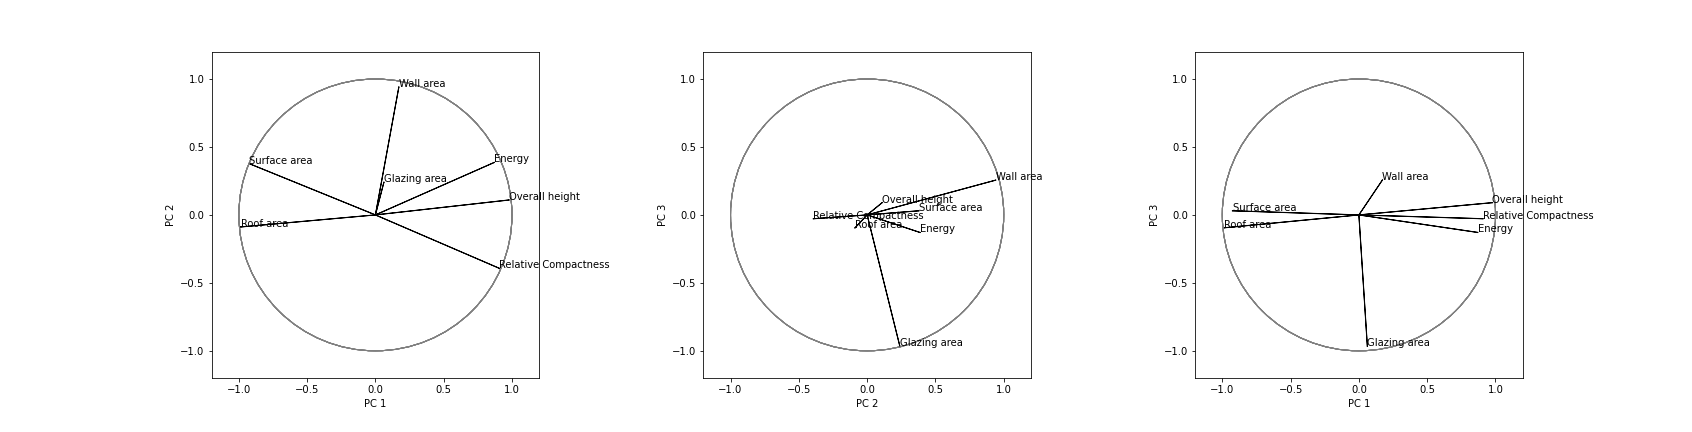

In [24]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])

c=plt.Circle((0,0), radius=1, color='gray', fill=False)
fig, axs = plt.subplots(1, 3, figsize=(23.5, 6))

for i, j, nom in zip(coord1,coord2, df.columns.values):
    axs[0].text(i, j, nom)
    axs[0].arrow(0,0,i,j,color='black')
    axs[0].add_patch(plt.Circle((0,0), radius=1, color='gray', fill=False))

for i, j, nom in zip(coord2,coord3, df.columns.values):
    axs[1].text(i, j, nom)
    axs[1].arrow(0,0,i,j,color='black')
    axs[1].add_patch(plt.Circle((0,0), radius=1, color='gray', fill=False))


for i, j, nom in zip(coord1,coord3, df.columns.values):
    axs[2].text(i, j, nom)
    axs[2].arrow(0,0,i,j,color='black')
    axs[2].add_patch(plt.Circle((0,0), radius=1, color='gray', fill=False))


for ax in axs:
    ax.axis((-1.2,1.2,-1.2,1.2))

axs[0].set(xlabel='PC 1', ylabel='PC 2')
axs[1].set(xlabel='PC 2', ylabel='PC 3')
axs[2].set(xlabel='PC 1', ylabel='PC 3')

plt.subplots_adjust(wspace=0.5)